# **Univariate Linear Regression**

- generated data
- Mean Squared Error
- gradient descent

### Generating Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def generate_data(NUM_SAMPLES=50):
    # generate dummy data for linear regression
    np.random.seed(1357)
    X = np.array(range(NUM_SAMPLES))
    random_noise = np.random.uniform(-10,40, size = NUM_SAMPLES)
    y = 4*X + random_noise
    return X,y

X,y = generate_data()
data = pd.DataFrame()
data['X'] = X
data['y'] = y

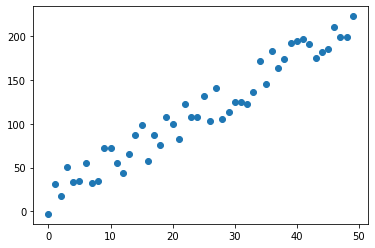

In [ ]:
plt.scatter(x=data['X'], y=data['y'])
plt.show()

### Splitting data into training/testing sets

In [ ]:
def train_test_split(data,ratio=0.8):
    m = len(data) # sample size
    shuffled_data = data.sample(frac=1).reset_index(drop=True) # shuffling data
    train_start = 0
    train_end = int(ratio*m)
    test_start = train_end

    X = shuffled_data['X']
    y = shuffled_data['y']

    X_train = X[train_start:train_end]
    X_test = X[test_start:]
    y_train = y[train_start:train_end]
    y_test = y[test_start:]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(data)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(40,) (40,) (10,) (10,)


### Univariate Linear Regression

In [ ]:
# h(x) = theta0 + theta1*x

def hypothesis(X,theta0=0,theta1=0):
    return theta0 + theta1*X


In [ ]:
def mean_squared_error(y,h):
    m = len(y)
    return (1/(2*m)) * np.sum((h - y)**2)

print(mean_squared_error(y_train, hypothesis(X_train)))

8308.787302054441


In [ ]:
# Gradient Descent

def gradient_descent(X_train, y_train, epochs=1500, learning_rate = 1e-3):
    
    theta0 = 0
    theta1 = 0
    
    m = len(X_train)
    h = hypothesis(X_train, theta0=theta0, theta1=theta1)
    cost = mean_squared_error(y_train,h)

    for i in range(epochs):

        temp0 = theta0 - learning_rate * (1/m) * np.sum(hypothesis(X_train, 
                                                           theta0=theta0, 
                                                           theta1=theta1) - y_train)
        
        temp1 = theta1 - learning_rate * (1/m) * np.sum((hypothesis(X_train, 
                                                           theta0=theta0, 
                                                           theta1=theta1) - y_train) * X_train)
        
        theta0 = temp0
        theta1 = temp1


    return theta0, theta1


theta0, theta1 = gradient_descent(X_train, y_train)

In [ ]:
y_test_h = hypothesis(X_test, theta0=theta0, theta1=theta1)
print(theta0,theta1)
print(mean_squared_error(y_test, y_test_h))

4.386437480421406 4.394226609369292
182.49186923992946


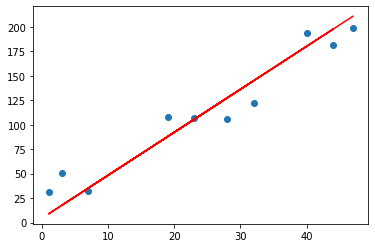

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_h, color='red')
plt.show()

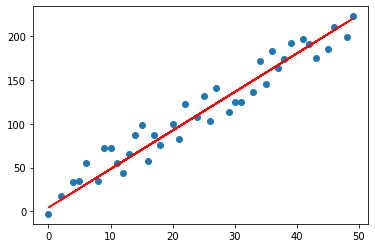

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train, hypothesis(X_train, theta0=theta0, theta1=theta1), color='red')
plt.show()